# 19장 세상에 없는 얼굴 GAN, 오토인코더

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D , Conv2D
from tensorflow.keras.models import Sequential, Model 

2024-08-29 14:20:49.224007: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-29 14:20:49.491237: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-29 14:20:50.710137: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.2/lib64
2024-08-29 14:20:50.710251: W tensorflow/compiler/xla/strea

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 예제 파일에서 data 폴더 아래에 이미지가 저장될 gan_images 폴더가 함께 제공됩니다.
# 만약 이미지가 저장될 폴더가 없다면 아래 코드의 주석을 해제해 gan_images 폴더를 만듭니다.
# import os
# if not os.path.exists("./data/gan_images"):
#    os.makedirs("./data/gan_images")

In [8]:
# 생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))


2024-08-29 14:20:57.397055: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-29 14:20:57.438790: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-29 14:20:57.438828: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-29 14:20:57.440316: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them i

In [11]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              633472    
                                                                 
 batch_normalization (BatchN  (None, 6272)             25088     
 ormalization)                                                   
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 64)        204864    
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

In [9]:
# 판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

In [10]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 activation_2 (Activation)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

In [6]:
# 생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 1)         865281    
                                                                 
 sequential_2 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


2024-08-29 11:28:12.700482: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-08-29 11:28:16.997708: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-08-29 11:28:28.535817: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-08-29 11:28:28.554947: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f53c222d960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-29 11:28:28.555560: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-08-29 11:28:28.628751: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_u

1/1 [==============================] - 1s 775ms/step


2024-08-29 11:28:33.917202: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/sequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


epoch:0  d_loss:0.7152  g_loss:0.4334
1/1 [==============================] - 0s 21ms/step
epoch:1  d_loss:0.4791  g_loss:0.1114
1/1 [==============================] - 0s 15ms/step
epoch:2  d_loss:0.4375  g_loss:0.0249
1/1 [==============================] - 0s 15ms/step
epoch:3  d_loss:0.4415  g_loss:0.0116
1/1 [==============================] - 0s 17ms/step
epoch:4  d_loss:0.4603  g_loss:0.0153
1/1 [==============================] - 0s 16ms/step
epoch:5  d_loss:0.4290  g_loss:0.0414
1/1 [==============================] - 0s 17ms/step
epoch:6  d_loss:0.4317  g_loss:0.1280
1/1 [==============================] - 0s 15ms/step
epoch:7  d_loss:0.4450  g_loss:0.2122
1/1 [==============================] - 0s 15ms/step
epoch:8  d_loss:0.4878  g_loss:0.2544
1/1 [==============================] - 0s 14ms/step
epoch:9  d_loss:0.4884  g_loss:0.2910
1/1 [==============================] - 0s 15ms/step
epoch:10  d_loss:0.4722  g_loss:0.3370
1/1 [==============================] - 0s 19ms/step
epoch:11 

1/1 [==============================] - 0s 15ms/step
epoch:179  d_loss:0.4727  g_loss:1.8365
1/1 [==============================] - 0s 15ms/step
epoch:180  d_loss:0.3203  g_loss:2.5656
1/1 [==============================] - 0s 15ms/step
epoch:181  d_loss:0.2953  g_loss:2.7610
1/1 [==============================] - 0s 22ms/step
epoch:182  d_loss:0.2192  g_loss:2.8427
1/1 [==============================] - 0s 15ms/step
epoch:183  d_loss:0.2896  g_loss:2.9015
1/1 [==============================] - 0s 16ms/step
epoch:184  d_loss:0.2583  g_loss:3.5653
1/1 [==============================] - 0s 16ms/step
epoch:185  d_loss:0.3143  g_loss:3.1200
1/1 [==============================] - 0s 16ms/step
epoch:186  d_loss:0.3927  g_loss:3.5168
1/1 [==============================] - 0s 17ms/step
epoch:187  d_loss:0.3888  g_loss:4.2324
1/1 [==============================] - 0s 16ms/step
epoch:188  d_loss:0.6878  g_loss:3.3538
1/1 [==============================] - 0s 17ms/step
epoch:189  d_loss:0.7780  g_

1/1 [==============================] - 0s 20ms/step
epoch:356  d_loss:0.3721  g_loss:2.3397
1/1 [==============================] - 0s 18ms/step
epoch:357  d_loss:0.2345  g_loss:2.0883
1/1 [==============================] - 0s 15ms/step
epoch:358  d_loss:0.3066  g_loss:2.0148
1/1 [==============================] - 0s 17ms/step
epoch:359  d_loss:0.3621  g_loss:1.7880
1/1 [==============================] - 0s 17ms/step
epoch:360  d_loss:0.4054  g_loss:2.1429
1/1 [==============================] - 0s 15ms/step
epoch:361  d_loss:0.3990  g_loss:2.0316
1/1 [==============================] - 0s 21ms/step
epoch:362  d_loss:0.3206  g_loss:1.9595
1/1 [==============================] - 0s 16ms/step
epoch:363  d_loss:0.3611  g_loss:2.0389
1/1 [==============================] - 0s 15ms/step
epoch:364  d_loss:0.3466  g_loss:1.7876
1/1 [==============================] - 0s 15ms/step
epoch:365  d_loss:0.5781  g_loss:1.6252
1/1 [==============================] - 0s 15ms/step
epoch:366  d_loss:0.3300  g_

1/1 [==============================] - 0s 17ms/step
epoch:533  d_loss:0.2895  g_loss:2.6887
1/1 [==============================] - 0s 15ms/step
epoch:534  d_loss:0.2630  g_loss:2.4068
1/1 [==============================] - 0s 29ms/step
epoch:535  d_loss:0.2396  g_loss:2.4194
1/1 [==============================] - 0s 15ms/step
epoch:536  d_loss:0.1317  g_loss:3.4694
1/1 [==============================] - 0s 16ms/step
epoch:537  d_loss:0.2143  g_loss:3.2349
1/1 [==============================] - 0s 17ms/step
epoch:538  d_loss:0.2364  g_loss:2.5587
1/1 [==============================] - 0s 17ms/step
epoch:539  d_loss:0.1617  g_loss:2.1946
1/1 [==============================] - 0s 17ms/step
epoch:540  d_loss:0.2310  g_loss:2.7137
1/1 [==============================] - 0s 16ms/step
epoch:541  d_loss:0.1449  g_loss:3.9212
1/1 [==============================] - 0s 15ms/step
epoch:542  d_loss:0.1385  g_loss:3.8220
1/1 [==============================] - 0s 14ms/step
epoch:543  d_loss:0.1428  g_

1/1 [==============================] - 0s 18ms/step
epoch:710  d_loss:0.2928  g_loss:1.9508
1/1 [==============================] - 0s 15ms/step
epoch:711  d_loss:0.3737  g_loss:2.6011
1/1 [==============================] - 0s 17ms/step
epoch:712  d_loss:0.3096  g_loss:2.1636
1/1 [==============================] - 0s 16ms/step
epoch:713  d_loss:0.5442  g_loss:1.9003
1/1 [==============================] - 0s 20ms/step
epoch:714  d_loss:0.4588  g_loss:1.4435
1/1 [==============================] - 0s 17ms/step
epoch:715  d_loss:0.4542  g_loss:1.3441
1/1 [==============================] - 0s 14ms/step
epoch:716  d_loss:0.4572  g_loss:1.7115
1/1 [==============================] - 0s 16ms/step
epoch:717  d_loss:0.5264  g_loss:1.8837
1/1 [==============================] - 0s 15ms/step
epoch:718  d_loss:0.3642  g_loss:2.3519
1/1 [==============================] - 0s 16ms/step
epoch:719  d_loss:0.3443  g_loss:2.5628
1/1 [==============================] - 0s 16ms/step
epoch:720  d_loss:0.5046  g_

1/1 [==============================] - 0s 17ms/step
epoch:887  d_loss:0.3266  g_loss:1.7795
1/1 [==============================] - 0s 16ms/step
epoch:888  d_loss:0.3975  g_loss:1.8016
1/1 [==============================] - 0s 15ms/step
epoch:889  d_loss:0.2820  g_loss:1.9623
1/1 [==============================] - 0s 15ms/step
epoch:890  d_loss:0.3500  g_loss:1.9387
1/1 [==============================] - 0s 19ms/step
epoch:891  d_loss:0.3869  g_loss:2.0343
1/1 [==============================] - 0s 17ms/step
epoch:892  d_loss:0.3372  g_loss:1.8845
1/1 [==============================] - 0s 15ms/step
epoch:893  d_loss:0.2778  g_loss:1.7363
1/1 [==============================] - 0s 18ms/step
epoch:894  d_loss:0.3666  g_loss:1.8022
1/1 [==============================] - 0s 20ms/step
epoch:895  d_loss:0.2902  g_loss:1.7370
1/1 [==============================] - 0s 17ms/step
epoch:896  d_loss:0.2341  g_loss:2.0110
1/1 [==============================] - 0s 20ms/step
epoch:897  d_loss:0.3006  g_

1/1 [==============================] - 0s 15ms/step
epoch:1064  d_loss:0.4547  g_loss:2.4063
1/1 [==============================] - 0s 17ms/step
epoch:1065  d_loss:0.3318  g_loss:2.1863
1/1 [==============================] - 0s 19ms/step
epoch:1066  d_loss:0.4350  g_loss:2.2512
1/1 [==============================] - 0s 16ms/step
epoch:1067  d_loss:0.3857  g_loss:2.6130
1/1 [==============================] - 0s 16ms/step
epoch:1068  d_loss:0.4416  g_loss:2.5034
1/1 [==============================] - 0s 16ms/step
epoch:1069  d_loss:0.4366  g_loss:2.0257
1/1 [==============================] - 0s 16ms/step
epoch:1070  d_loss:0.4896  g_loss:1.7187
1/1 [==============================] - 0s 16ms/step
epoch:1071  d_loss:0.4148  g_loss:1.6426
1/1 [==============================] - 0s 15ms/step
epoch:1072  d_loss:0.3237  g_loss:1.7879
1/1 [==============================] - 0s 15ms/step
epoch:1073  d_loss:0.4936  g_loss:1.6782
1/1 [==============================] - 0s 16ms/step
epoch:1074  d_loss

epoch:1239  d_loss:0.5051  g_loss:1.7368
1/1 [==============================] - 0s 16ms/step
epoch:1240  d_loss:0.3667  g_loss:1.7040
1/1 [==============================] - 0s 15ms/step
epoch:1241  d_loss:0.4339  g_loss:2.0104
1/1 [==============================] - 0s 18ms/step
epoch:1242  d_loss:0.4419  g_loss:2.0562
1/1 [==============================] - 0s 15ms/step
epoch:1243  d_loss:0.3478  g_loss:2.5702
1/1 [==============================] - 0s 15ms/step
epoch:1244  d_loss:0.4356  g_loss:2.0805
1/1 [==============================] - 0s 18ms/step
epoch:1245  d_loss:0.3227  g_loss:2.2058
1/1 [==============================] - 0s 14ms/step
epoch:1246  d_loss:0.3699  g_loss:2.2796
1/1 [==============================] - 0s 16ms/step
epoch:1247  d_loss:0.2896  g_loss:2.0986
1/1 [==============================] - 0s 16ms/step
epoch:1248  d_loss:0.3287  g_loss:1.7188
1/1 [==============================] - 0s 16ms/step
epoch:1249  d_loss:0.2719  g_loss:2.0414
1/1 [========================

1/1 [==============================] - 0s 16ms/step
epoch:1328  d_loss:0.4365  g_loss:2.3556
1/1 [==============================] - 0s 18ms/step
epoch:1329  d_loss:0.3166  g_loss:2.1098
1/1 [==============================] - 0s 19ms/step
epoch:1330  d_loss:0.4105  g_loss:2.0273
1/1 [==============================] - 0s 15ms/step
epoch:1331  d_loss:0.5841  g_loss:1.7148
1/1 [==============================] - 0s 14ms/step
epoch:1332  d_loss:0.4254  g_loss:1.8990
1/1 [==============================] - 0s 15ms/step
epoch:1333  d_loss:0.4957  g_loss:1.6628
1/1 [==============================] - 0s 16ms/step
epoch:1334  d_loss:0.4257  g_loss:1.6571
1/1 [==============================] - 0s 17ms/step
epoch:1335  d_loss:0.4150  g_loss:1.8270
1/1 [==============================] - 0s 18ms/step
epoch:1336  d_loss:0.4473  g_loss:1.7206
1/1 [==============================] - 0s 18ms/step
epoch:1337  d_loss:0.5006  g_loss:1.4759
1/1 [==============================] - 0s 16ms/step
epoch:1338  d_loss

epoch:1415  d_loss:0.5020  g_loss:1.6932
1/1 [==============================] - 0s 16ms/step
epoch:1416  d_loss:0.3596  g_loss:1.8441
1/1 [==============================] - 0s 17ms/step
epoch:1417  d_loss:0.5572  g_loss:2.2790
1/1 [==============================] - 0s 18ms/step
epoch:1418  d_loss:0.4151  g_loss:2.2487
1/1 [==============================] - 0s 15ms/step
epoch:1419  d_loss:0.6094  g_loss:2.3476
1/1 [==============================] - 0s 16ms/step
epoch:1420  d_loss:0.4594  g_loss:2.1986
1/1 [==============================] - 0s 15ms/step
epoch:1421  d_loss:0.5372  g_loss:2.4356
1/1 [==============================] - 0s 17ms/step
epoch:1422  d_loss:0.5800  g_loss:1.9098
1/1 [==============================] - 0s 18ms/step
epoch:1423  d_loss:0.4013  g_loss:2.1001
1/1 [==============================] - 0s 17ms/step
epoch:1424  d_loss:0.4021  g_loss:1.7598
1/1 [==============================] - 0s 19ms/step
epoch:1425  d_loss:0.3270  g_loss:2.3382
1/1 [========================

1/1 [==============================] - 0s 15ms/step
epoch:1504  d_loss:0.5561  g_loss:1.4707
1/1 [==============================] - 0s 17ms/step
epoch:1505  d_loss:0.5535  g_loss:1.9254
1/1 [==============================] - 0s 15ms/step
epoch:1506  d_loss:0.4817  g_loss:1.7488
1/1 [==============================] - 0s 17ms/step
epoch:1507  d_loss:0.5758  g_loss:1.5133
1/1 [==============================] - 0s 20ms/step
epoch:1508  d_loss:0.6054  g_loss:1.7957
1/1 [==============================] - 0s 15ms/step
epoch:1509  d_loss:0.6004  g_loss:1.8700
1/1 [==============================] - 0s 21ms/step
epoch:1510  d_loss:0.7192  g_loss:1.7663
1/1 [==============================] - 0s 16ms/step
epoch:1511  d_loss:0.7592  g_loss:1.5533
1/1 [==============================] - 0s 15ms/step
epoch:1512  d_loss:0.5077  g_loss:1.4637
1/1 [==============================] - 0s 16ms/step
epoch:1513  d_loss:0.6189  g_loss:1.0906
1/1 [==============================] - 0s 15ms/step
epoch:1514  d_loss

epoch:1679  d_loss:0.4661  g_loss:1.9697
1/1 [==============================] - 0s 14ms/step
epoch:1680  d_loss:0.4329  g_loss:2.0047
1/1 [==============================] - 0s 16ms/step
epoch:1681  d_loss:0.3469  g_loss:2.0498
1/1 [==============================] - 0s 16ms/step
epoch:1682  d_loss:0.4611  g_loss:1.8558
1/1 [==============================] - 0s 15ms/step
epoch:1683  d_loss:0.4277  g_loss:1.7105
1/1 [==============================] - 0s 14ms/step
epoch:1684  d_loss:0.4840  g_loss:1.3154
1/1 [==============================] - 0s 16ms/step
epoch:1685  d_loss:0.6185  g_loss:1.4150
1/1 [==============================] - 0s 15ms/step
epoch:1686  d_loss:0.5364  g_loss:1.7275
1/1 [==============================] - 0s 15ms/step
epoch:1687  d_loss:0.6334  g_loss:1.9139
1/1 [==============================] - 0s 16ms/step
epoch:1688  d_loss:0.6353  g_loss:1.4646
1/1 [==============================] - 0s 14ms/step
epoch:1689  d_loss:0.4705  g_loss:1.9419
1/1 [========================

1/1 [==============================] - 0s 15ms/step
epoch:1768  d_loss:0.7308  g_loss:1.6306
1/1 [==============================] - 0s 16ms/step
epoch:1769  d_loss:0.6355  g_loss:1.5949
1/1 [==============================] - 0s 17ms/step
epoch:1770  d_loss:0.5601  g_loss:1.6687
1/1 [==============================] - 0s 16ms/step
epoch:1771  d_loss:0.4482  g_loss:1.8238
1/1 [==============================] - 0s 16ms/step
epoch:1772  d_loss:0.5812  g_loss:1.7335
1/1 [==============================] - 0s 17ms/step
epoch:1773  d_loss:0.6583  g_loss:1.3315
1/1 [==============================] - 0s 17ms/step
epoch:1774  d_loss:0.6216  g_loss:1.3781
1/1 [==============================] - 0s 16ms/step
epoch:1775  d_loss:0.6021  g_loss:1.2054
1/1 [==============================] - 0s 16ms/step
epoch:1776  d_loss:0.5211  g_loss:1.3233
1/1 [==============================] - 0s 17ms/step
epoch:1777  d_loss:0.4769  g_loss:1.5919
1/1 [==============================] - 0s 16ms/step
epoch:1778  d_loss

epoch:1855  d_loss:0.4926  g_loss:1.6443
1/1 [==============================] - 0s 18ms/step
epoch:1856  d_loss:0.4900  g_loss:1.6535
1/1 [==============================] - 0s 15ms/step
epoch:1857  d_loss:0.5456  g_loss:1.8601
1/1 [==============================] - 0s 18ms/step
epoch:1858  d_loss:0.5411  g_loss:1.8119
1/1 [==============================] - 0s 16ms/step
epoch:1859  d_loss:0.6122  g_loss:1.7392
1/1 [==============================] - 0s 16ms/step
epoch:1860  d_loss:0.5090  g_loss:1.5310
1/1 [==============================] - 0s 19ms/step
epoch:1861  d_loss:0.4614  g_loss:1.9847
1/1 [==============================] - 0s 14ms/step
epoch:1862  d_loss:0.5184  g_loss:2.0002
1/1 [==============================] - 0s 16ms/step
epoch:1863  d_loss:0.3808  g_loss:1.9709
1/1 [==============================] - 0s 17ms/step
epoch:1864  d_loss:0.5834  g_loss:1.6097
1/1 [==============================] - 0s 16ms/step
epoch:1865  d_loss:0.4502  g_loss:1.6799
1/1 [========================

1/1 [==============================] - 0s 20ms/step
epoch:1944  d_loss:0.5195  g_loss:1.3265
1/1 [==============================] - 0s 17ms/step
epoch:1945  d_loss:0.3346  g_loss:1.8653
1/1 [==============================] - 0s 20ms/step
epoch:1946  d_loss:0.3913  g_loss:1.8633
1/1 [==============================] - 0s 18ms/step
epoch:1947  d_loss:0.4673  g_loss:1.9426
1/1 [==============================] - 0s 18ms/step
epoch:1948  d_loss:0.4803  g_loss:1.7959
1/1 [==============================] - 0s 18ms/step
epoch:1949  d_loss:0.4003  g_loss:1.6704
1/1 [==============================] - 0s 21ms/step
epoch:1950  d_loss:0.5002  g_loss:1.8326
1/1 [==============================] - 0s 23ms/step
epoch:1951  d_loss:0.5244  g_loss:1.5299
1/1 [==============================] - 0s 19ms/step
epoch:1952  d_loss:0.5749  g_loss:1.7747
1/1 [==============================] - 0s 18ms/step
epoch:1953  d_loss:0.3871  g_loss:1.9756
1/1 [==============================] - 0s 18ms/step
epoch:1954  d_loss

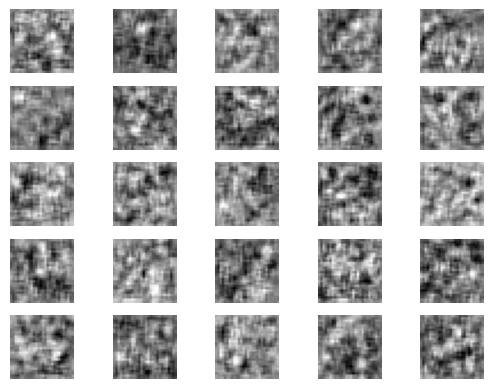

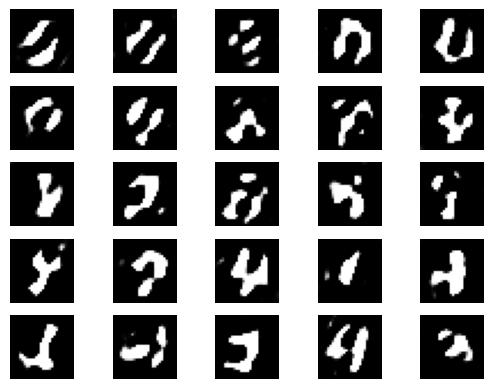

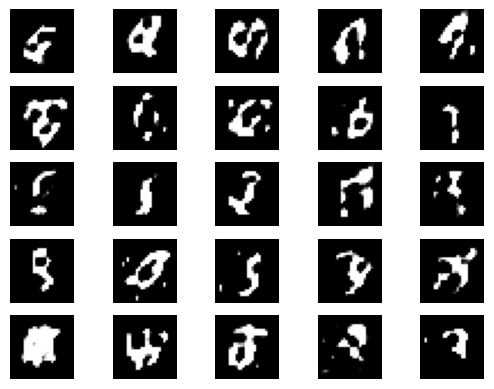

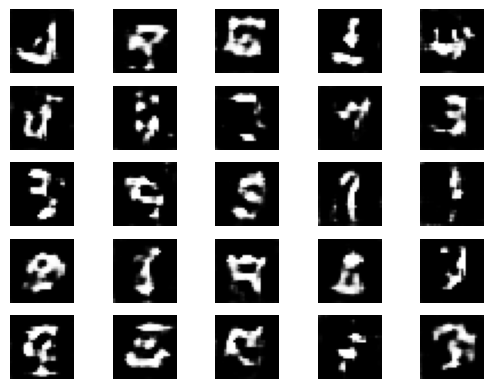

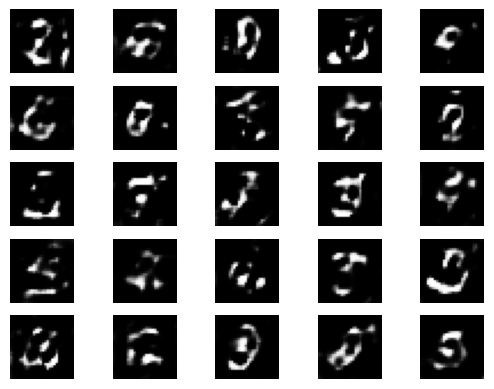

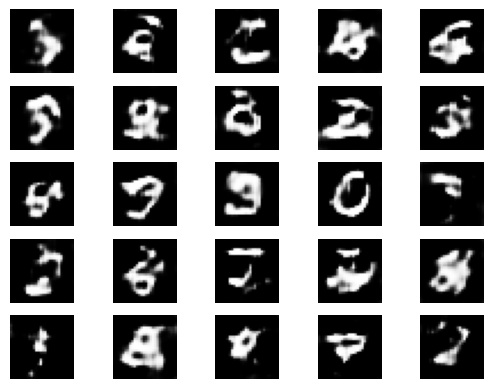

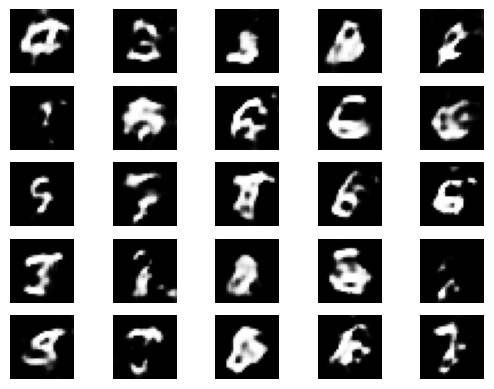

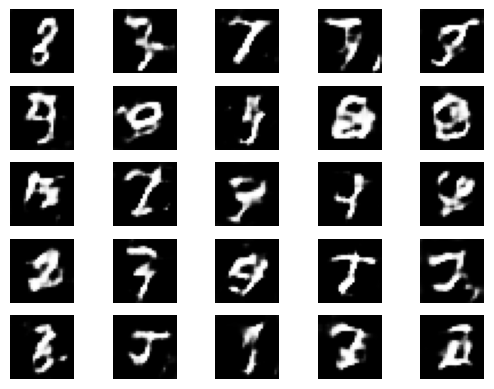

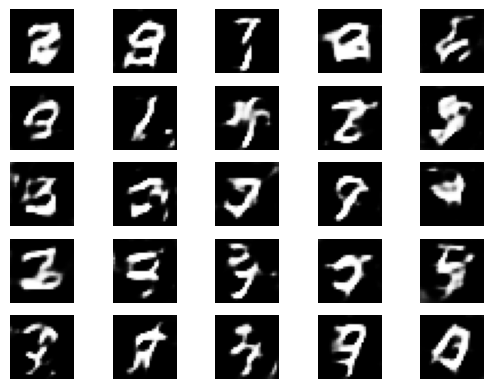

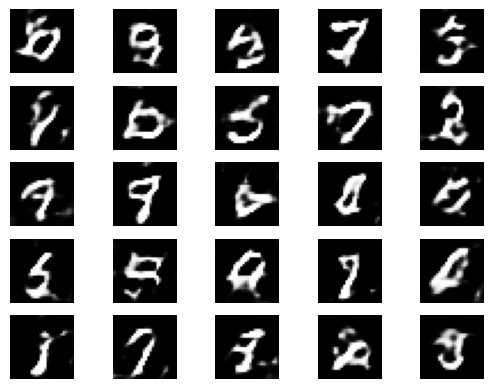

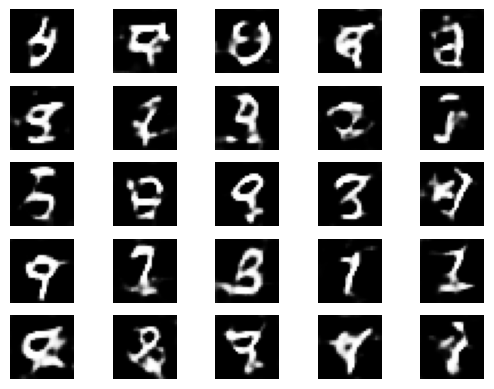

In [8]:
# 신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터를 불러옵니다.

  (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온 적 있는 MNIST를 다시 이용합니다. 단, 테스트 과정은 필요 없고 이미지만 사용할 것이기 때문에 X_train만 불러왔습니다.
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  # 픽셀 값은 0에서 255 사이의 값입니다. 이전에 255로 나누어 줄때는 이를 0~1 사이의 값으로 바꾸었던 것인데, 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.
  # X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
          # 실제 데이터를 판별자에 입력하는 부분입니다.
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true)

          # 가상 이미지를 판별자에 입력하는 부분입니다.
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          # 판별자와 생성자의 오차를 계산합니다.
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          g_loss = gan.train_on_batch(noise, true)

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이 부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 본 장의 주요 내용과 관련이 없어
        # 소스 코드만 첨부합니다. 만들어진 이미지들은 gan_images 폴더에 저장됩니다.
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("./data/gan_images/gan_mnist_%d.png" % i)

gan_train(2001, 32, 200)  # 2000번 반복되고, 배치 사이즈는 32,  200번마다 결과가 저장되게 하였습니다.